In [1]:
from scviz import pAnnData as pAnnData
from scviz import plotting as scplt
from scviz import utils as scutils
import scanpy as sc

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='paper', style='ticks')

import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

In [3]:
# David_20250203_OA_DIA_TS25_1hr_100ng_BK-892_01
obs_columns = ['User','Date','MS','Acquisition','Column','Grad','InputAmount','Sample','Rep']
pdata = pAnnData.import_diann(report_file='report.parquet', obs_columns=obs_columns)

--------------------------
Starting import...
--------------------------
Importing from report.parquet
Number of files: 6
Number of proteins: 9639
Number of files: 6
Number of peptides: 141043
RS matrix successfully computed
Setting rs matrix with dimensions (141043, 9639)
Transposing rs matrix to protein x peptide format
pAnnData object created. Use `print(pdata)` to view the object.


In [4]:
pdata.summary

,User,Date,MS,Acquisition,Column,Grad,InputAmount,Sample,Rep,protein_quant,protein_count,protein_abundance_sum,peptide_quant,peptide_count,peptide_abundance_sum
David_20250203_OA_DIA_TS25_1hr_100ng_BK-892_01,David,20250203,OA,DIA,TS25,1hr,100ng,BK-892,01,0.931632,8980,1.636838e+11,0.858660,121108,6.413548e+11
David_20250203_OA_DIA_TS25_1hr_100ng_BK-1078_02,David,20250203,OA,DIA,TS25,1hr,100ng,BK-1078,02,0.941280,9073,1.728928e+11,0.915621,129142,6.460753e+11
David_20250203_OA_DIA_TS25_1hr_100ng_BK-1355_03,David,20250203,OA,DIA,TS25,1hr,100ng,BK-1355,03,0.940969,9070,1.651625e+11,0.896053,126382,6.412685e+11
David_20250203_OA_DIA_TS25_1hr_100ng_BK-Ren_06,David,20250203,OA,DIA,TS25,1hr,100ng,BK-Ren,06,0.943666,9096,1.696736e+11,0.911360,128541,6.377371e+11
David_20250203_OA_DIA_TS25_1hr_100ng_BK-Rosa_05,David,20250203,OA,DIA,TS25,1hr,100ng,BK-Rosa,05,0.930076,8965,1.786566e+11,0.878555,123914,6.550592e+11
David_20250203_OA_DIA_TS25_1hr_100ng_BK-Luc_04,David,20250203,OA,DIA,TS25,1hr,100ng,BK-Luc,04,0.069094,666,8.770053e+10,0.010160,1433,1.720556e+11


<Axes: xlabel='Sample', ylabel='protein_count'>

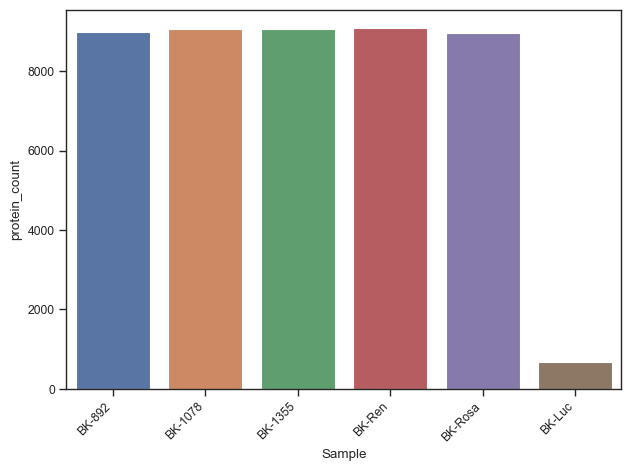

In [7]:
fig, ax = plt.subplots()
scplt.plot_summary(ax, pdata, classes = "Sample")

In [15]:
# find proteins that contain 'RFWD' in their gene name, prot.var['Genes']
prot = pdata.prot
rfwd_proteins = prot.var_names[prot.var['Genes'].str.contains('RFWD')]
# get list of names from rfwd_proteins
rfwd_proteins.tolist()

['Q6PCD5']

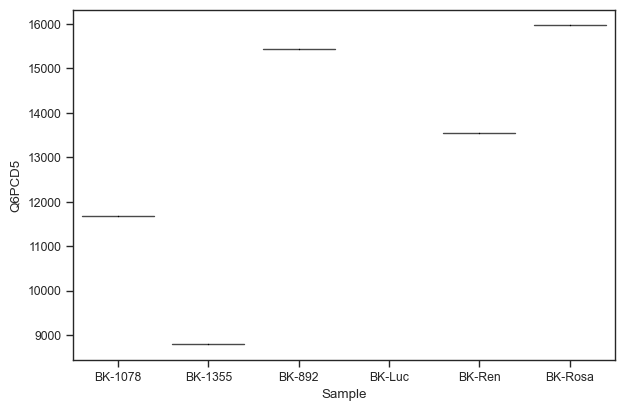

In [16]:
# convert pdata.prot.obs['Sample'] to categorical
pdata.prot.obs['Sample'] = pd.Categorical(pdata.prot.obs['Sample'])
sc.pl.violin(pdata.prot, rfwd_proteins.tolist(), groupby='Sample')
#pdata.prot[:,'P14618-2']